Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt



Uploading Dataset

In [5]:
 
train_data = pd.read_csv("genre_train.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())
print(train_data.shape)

C:\Users\aryan\AppData\Local\Temp\ipykernel_9636\661997358.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("genre_train.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


In [6]:
test_data = pd.read_csv("genre_test.txt",sep=':::', names=['ID', 'TITLE','DESCRIPTION','GENRE'])
print(display(test_data.head()))
print(test_data.shape)



C:\Users\aryan\AppData\Local\Temp\ipykernel_9636\2515145763.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("genre_test.txt",sep=':::', names=['ID', 'TITLE','DESCRIPTION','GENRE'])


,ID,TITLE,DESCRIPTION,GENRE
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


In [7]:
test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

C:\Users\aryan\AppData\Local\Temp\ipykernel_9636\4233968125.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


Data Visualization

<Figure size 1000x1000 with 0 Axes>

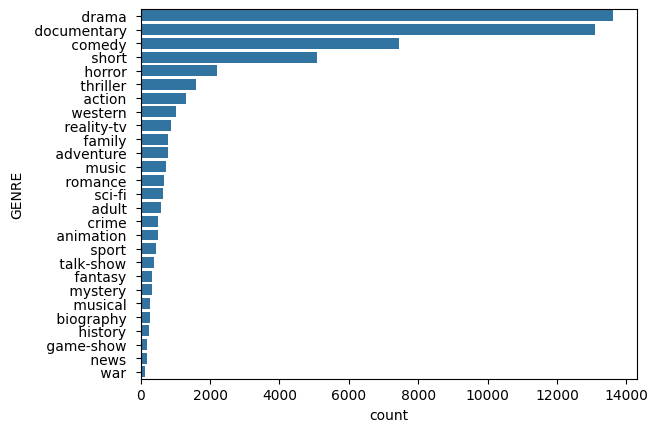

<Figure size 1000x1000 with 0 Axes>

In [8]:
import seaborn as sns
sns.countplot(y=train_data['GENRE'],order=train_data['GENRE'].value_counts().index)
plt.figure(figsize=(10,10))

Dara PreProcessing

In [9]:
train_data.isnull().sum()


ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [10]:
test_data.fillna("",inplace=True)
test_data.isnull().sum()

C:\Users\aryan\AppData\Local\Temp\ipykernel_9636\3244561905.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data.fillna("",inplace=True)


ID             0
TITLE          0
DESCRIPTION    0
GENRE          0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder  
from sklearn.feature_extraction.text import TfidfVectorizer

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

Training The Model

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
lr.score(X_train,y_train)

0.7096690891651602

In [14]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [15]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

clf = LinearSVC()
clf.fit(X_train, y_train)


LinearSVC()

In [16]:
clf.score(X_train,y_train)

0.9735123768768215

In [17]:
pred=clf.predict(X_test)
pred

array([5, 8, 7, ..., 8, 8, 8])

Evaluation

In [20]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = Mnb_classifier.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie on engineering student"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie on political leader."
print(predict_movie(sample_descr_for_movie1))

 drama 
 documentary 
